In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Preprocessing

In [2]:
# load data
Data = pd.read_csv('Water Quality Suangi China.csv', delimiter=';')

In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    168 non-null    float64
 1   NO.     168 non-null    object 
 2   PH      168 non-null    float64
 3   DO      168 non-null    float64
 4   COD     168 non-null    int64  
 5   NH3-N   168 non-null    float64
 6   TP      168 non-null    float64
 7   CODMn   168 non-null    float64
 8   F       168 non-null    float64
 9   Oil     168 non-null    float64
 10  Cr6+    168 non-null    float64
 11  LAS     168 non-null    float64
 12  Cu      168 non-null    float64
 13  Zn      168 non-null    float64
 14  Cd      168 non-null    float64
 15  As      168 non-null    float64
 16  Hg      168 non-null    float64
 17  CN      168 non-null    float64
 18  VP      168 non-null    float64
 19  S       168 non-null    float64
 20  Se      168 non-null    float64
dtypes: float64(19), int64(1), object(1)
mem

<Figure size 1500x800 with 0 Axes>

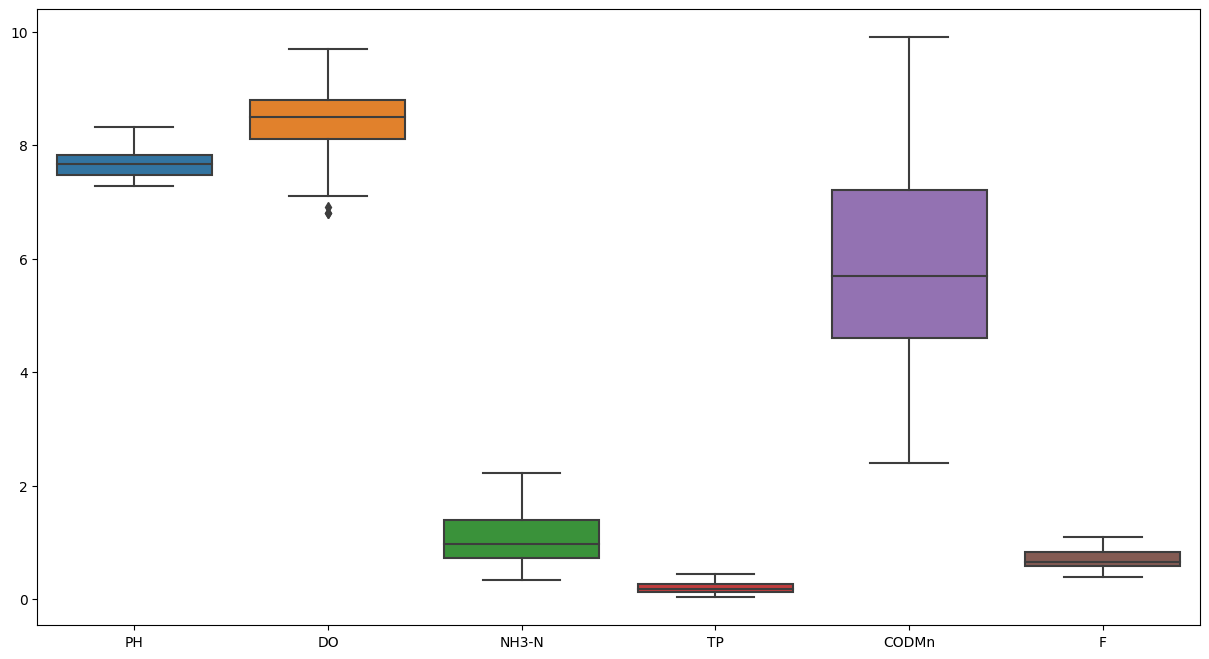

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))

# Membuat boxplot hanya untuk kolom terpilih
plt.figure(figsize=(15, 8))
sns.boxplot(data=Data[['PH','DO','NH3-N','TP','CODMn','F']])

# Menampilkan plot
plt.show()


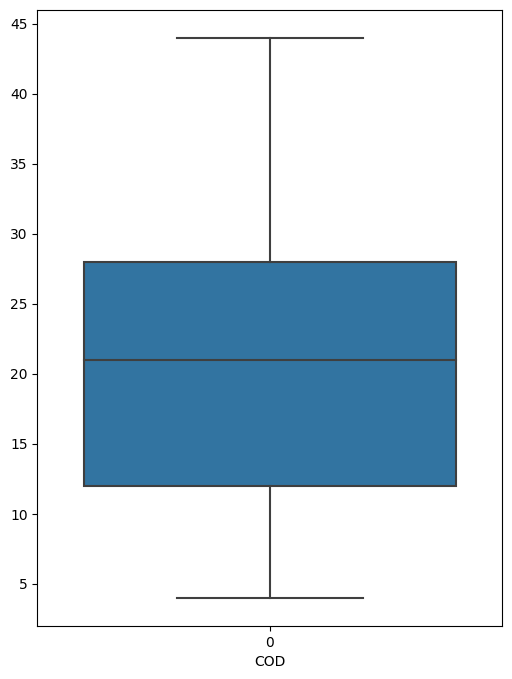

In [5]:
# Membuat boxplot hanya untuk kolom terpilih
plt.figure(figsize=(6, 8))
sns.boxplot(data=Data['COD'])
plt.xlabel('COD')

# Menampilkan plot
plt.show()

<Figure size 1500x800 with 0 Axes>

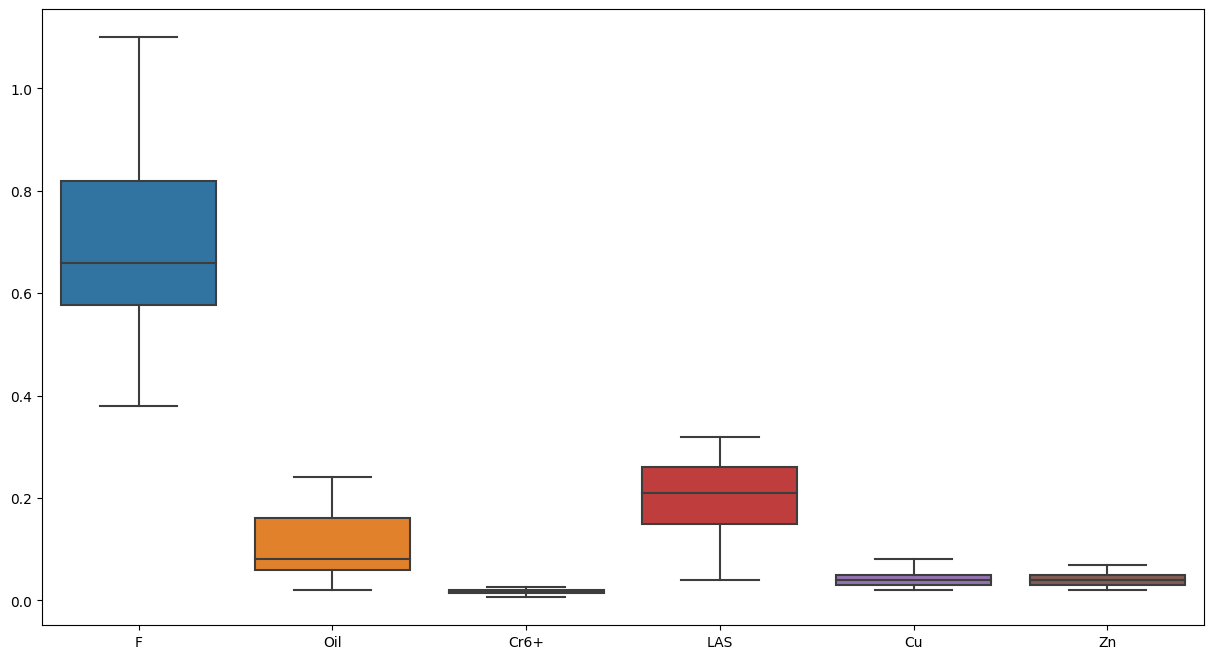

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))

# Membuat boxplot hanya untuk kolom terpilih
plt.figure(figsize=(15, 8))
sns.boxplot(data=Data[['F', 'Oil', 'Cr6+', 'LAS', 'Cu', 'Zn']])

# Menampilkan plot
plt.show()

<Figure size 1500x800 with 0 Axes>

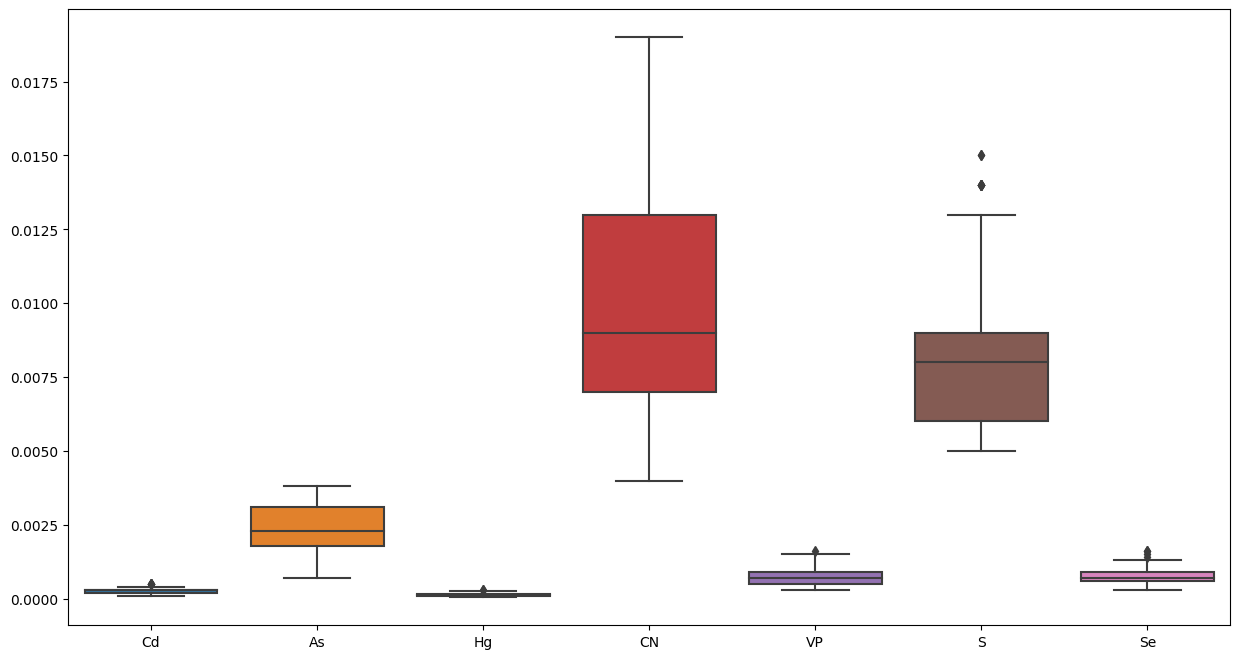

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))

# Membuat boxplot hanya untuk kolom terpilih
plt.figure(figsize=(15, 8))
sns.boxplot(data=Data[['Cd', 'As', 'Hg', 'CN', 'VP', 'S', 'Se']])

# Menampilkan plot
plt.show()

In [8]:
Data.describe()

,date,PH,DO,COD,NH3-N,TP,CODMn,F,Oil,Cr6+,LAS,Cu,Zn,Cd,As,Hg,CN,VP,S,Se
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.00000,168.000000
mean,2019.569167,7.649226,8.398095,20.577381,1.057262,0.196369,5.725595,0.679643,0.105417,0.016292,0.201905,0.042917,0.041548,0.000282,0.002360,0.000139,0.010381,0.000714,0.00819,0.000740
std,0.475944,0.214766,0.561424,10.062974,0.413162,0.090298,1.711882,0.157506,0.050088,0.004458,0.066746,0.016171,0.010029,0.000080,0.000822,0.000055,0.003947,0.000301,0.00255,0.000275
min,2019.070000,7.270000,6.800000,4.000000,0.330000,0.030000,2.400000,0.380000,0.020000,0.006000,0.040000,0.020000,0.020000,0.000100,0.000700,0.000050,0.004000,0.000300,0.00500,0.000300
25%,2019.097500,7.470000,8.100000,12.000000,0.730000,0.130000,4.600000,0.577500,0.060000,0.014000,0.150000,0.030000,0.030000,0.000200,0.001800,0.000090,0.007000,0.000500,0.00600,0.000600
50%,2019.565000,7.665000,8.500000,21.000000,0.970000,0.175000,5.700000,0.660000,0.080000,0.017000,0.210000,0.040000,0.040000,0.000300,0.002300,0.000130,0.009000,0.000700,0.00800,0.000700
75%,2020.042500,7.822500,8.800000,28.000000,1.385000,0.260000,7.200000,0.820000,0.160000,0.020000,0.260000,0.050000,0.050000,0.000300,0.003100,0.000160,0.013000,0.000900,0.00900,0.000900
max,2020.070000,8.310000,9.700000,44.000000,2.220000,0.440000,9.900000,1.100000,0.240000,0.026000,0.320000,0.080000,0.070000,0.000500,0.003800,0.000300,0.019000,0.001600,0.01500,0.001600


## Cluster Spatial

In [67]:
df = Data.drop(columns=['date'], axis=1)

In [68]:
# Mengagregasi data pada NO dengan menggunakan Avg
df = df.groupby('NO.').mean().reset_index()

# Menampilkan hasil agregasi
print(df)

   NO.        PH        DO        COD     NH3-N        TP     CODMn         F  \
0   M1  7.560000  7.566667  30.083333  1.635000  0.375000  8.283333  0.552500   
1   M2  7.645833  8.708333  15.666667  0.885833  0.200833  3.733333  0.848333   
2   M3  7.787500  8.525000  17.583333  1.275000  0.224167  6.066667  0.607500   
3   M4  7.700000  8.583333  26.583333  1.200000  0.225000  6.158333  0.640833   
4   M5  7.790833  8.091667  32.083333  0.935000  0.193333  6.525000  0.669167   
5   M6  7.610833  8.175000  26.333333  0.897500  0.141667  5.841667  0.806667   
6   M7  7.620833  8.375000  25.416667  0.855833  0.155000  6.383333  0.814167   
7   M8  7.704167  8.848333  23.583333  0.737500  0.152500  6.341667  0.778333   
8   T1  7.626667  8.558333  26.916667  1.386667  0.313333  7.091667  0.842500   
9   T2  7.595833  8.233333   9.166667  1.343333  0.160833  4.691667  0.443333   
10  T3  7.627500  8.625000   8.833333  1.461667  0.104167  5.591667  0.453333   
11  T4  7.643333  8.408333  

In [69]:
df1 = df.drop(columns=['NO.'], axis=1)

In [70]:
#Scaling data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df1)
scaled_df = pd.DataFrame(scaled_df, columns= df1.columns)
scaled_df.head()


,PH,DO,COD,NH3-N,TP,CODMn,F,Oil,Cr6+,LAS,Cu,Zn,Cd,As,Hg,CN,VP,S,Se
0,-1.277866,-2.723320,1.240478,1.867456,2.453740,1.842557,-0.902664,1.807893,0.405592,2.025612,1.226642,2.245217,-0.838548,1.225141,1.311989,1.936865,1.814313,1.779760,1.253382
1,-0.048591,1.016176,-0.640823,-0.554118,0.061323,-1.435196,1.197635,-0.120526,-1.831310,1.279334,0.876173,-0.853815,-1.011190,-0.354877,0.456934,0.462467,-0.802956,0.625475,-0.465784
2,1.980309,0.415673,-0.390708,0.703807,0.381838,0.245703,-0.512186,-1.172391,-0.307267,-0.753631,-0.245328,1.359779,0.542590,-0.723548,0.615278,-0.755515,0.098071,-0.528810,-0.110094
3,0.727165,0.606742,0.783746,0.461381,0.393285,0.311738,-0.275532,-0.471148,0.798894,0.533056,-0.035047,-0.189737,0.369948,0.786247,0.900296,-0.018316,1.728501,1.461336,1.549790
4,2.028048,-1.003698,1.501468,-0.395194,-0.041700,0.575879,-0.074377,-0.602631,0.405592,-0.290424,0.105141,-0.632456,1.233159,1.207585,0.551940,1.520187,-0.416802,-0.409402,1.194101


In [71]:
scaled_df

,PH,DO,COD,NH3-N,TP,CODMn,F,Oil,Cr6+,LAS,Cu,Zn,Cd,As,Hg,CN,VP,S,Se
0,-1.277866,-2.723320,1.240478,1.867456,2.453740,1.842557,-0.902664,1.807893,0.405592,2.025612,1.226642,2.245217,-0.838548,1.225141,1.311989,1.936865,1.814313,1.779760,1.253382
1,-0.048591,1.016176,-0.640823,-0.554118,0.061323,-1.435196,1.197635,-0.120526,-1.831310,1.279334,0.876173,-0.853815,-1.011190,-0.354877,0.456934,0.462467,-0.802956,0.625475,-0.465784
2,1.980309,0.415673,-0.390708,0.703807,0.381838,0.245703,-0.512186,-1.172391,-0.307267,-0.753631,-0.245328,1.359779,0.542590,-0.723548,0.615278,-0.755515,0.098071,-0.528810,-0.110094
3,0.727165,0.606742,0.783746,0.461381,0.393285,0.311738,-0.275532,-0.471148,0.798894,0.533056,-0.035047,-0.189737,0.369948,0.786247,0.900296,-0.018316,1.728501,1.461336,1.549790
4,2.028048,-1.003698,1.501468,-0.395194,-0.041700,0.575879,-0.074377,-0.602631,0.405592,-0.290424,0.105141,-0.632456,1.233159,1.207585,0.551940,1.520187,-0.416802,-0.409402,1.194101
5,-0.549849,-0.730742,0.751122,-0.516408,-0.751412,0.083616,0.901819,1.281960,1.265939,0.249985,-0.175235,0.474342,1.751086,0.610690,-0.366452,0.782988,0.140977,-0.887037,-0.228658
6,-0.406632,-0.075648,0.631502,-0.651089,-0.568260,0.473825,0.955066,0.975166,0.774312,0.121316,-0.525704,-0.853815,0.542590,0.575578,-0.588133,0.334258,0.355507,-0.489007,0.008469
7,0.786838,1.474742,0.392261,-1.033585,-0.602601,0.443809,0.700663,0.821769,0.331848,0.069849,-1.296736,-1.739253,-0.320621,0.101573,-1.063163,-0.659358,-0.717144,-1.086052,-0.643629
8,-0.323090,0.524855,0.827244,1.064754,1.606664,0.984098,1.156221,0.098612,0.749731,1.021997,2.488330,0.474342,-0.493264,0.347353,0.425265,1.039405,1.471064,1.938972,0.897693
9,-0.764674,-0.539673,-1.489039,0.924685,-0.488132,-0.744827,-1.677704,-0.668372,-0.405592,-0.959500,-0.105141,-0.632456,-0.493264,-1.496002,-1.284844,-1.043984,-0.631332,-0.449205,-0.940037


### Inertia Method

In [72]:
# finding optimal number of clusters
inertia = []
max_clusters = 11
for n_cluster in range(1, max_clusters):
    kmeans = KMeans(n_clusters=n_cluster, random_state=123, n_init=n_cluster)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

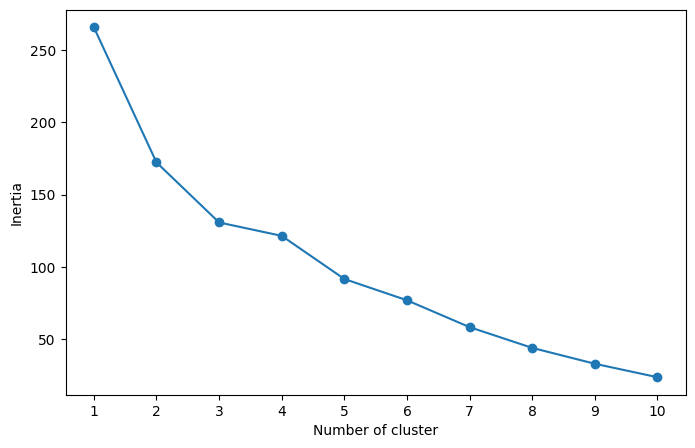

In [73]:
#Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(np.arange(1, max_clusters), inertia, marker='o')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.xticks(np.arange(1, max_clusters))
plt.show()



Dalam kurva elbow, titik 'belokan' yang terbentuk pada grafik umumnya dianggap sebagai petunjuk jumlah klaster yang sesuai. Meskipun demikian, nilai 'optimal' dari 'k' yang diperoleh dari metode kurva elbow sering kali agak "ambigu" atau tidak sepenuhnya pasti dalam menentukan jumlah klaster ('k') yang terbaik. Pada grafik di atas, pilihan 'k' diatur menjadi 2 atau 3 karena grafik yang dihasilkan menunjukkan adanya belokan dan kemudian level off. Untuk memastikan bahwa 'k' yang dipilih memang optimal, analisis lebih lanjut akan dilakukan menggunakan analisis silhouette.

### Silhouette Analysis Method

In [76]:
from sklearn.metrics import silhouette_score

# Silhouette Analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:

    # Initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=500, random_state=123)
    kmeans.fit(scaled_df)
    cluster_labels = kmeans.labels_

    # Silhouette Score
    silhouette_avg = silhouette_score(scaled_df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))



For n_clusters=2, the silhouette score is 0.23734151407931883
For n_clusters=3, the silhouette score is 0.2127398894732709
For n_clusters=4, the silhouette score is 0.16387134200149675
For n_clusters=5, the silhouette score is 0.14744835178106164
For n_clusters=6, the silhouette score is 0.1290974345146945
For n_clusters=7, the silhouette score is 0.11438423882047333
For n_clusters=8, the silhouette score is 0.11546826907433161



Silhouette score dapat membantu menentukan jumlah cluster yang optimal dalam analisis klaster (clustering). Semakin tinggi silhouette score, semakin baik. Dalam kasus ini, score tertinggi adalah untuk n_clusters=2 dengan nilai silhouette sebesar 0.2439.

Jadi, berdasarkan nilai silhouette score, jumlah cluster terbaik adalah 2.  

In [77]:
from sklearn.cluster import KMeans

# Inisialisasi objek KMeans dengan 2 cluster
kmeans = KMeans(n_clusters=2, random_state=1)

# Melakukan fitting dan prediksi label cluster
scaled_df['cluster'] = kmeans.fit_predict(scaled_df)

# Menampilkan DataFrame yang sudah ditambahkan kolom cluster
print(scaled_df)

          PH        DO       COD     NH3-N        TP     CODMn         F  \
0  -1.277866 -2.723320  1.240478  1.867456  2.453740  1.842557 -0.902664   
1  -0.048591  1.016176 -0.640823 -0.554118  0.061323 -1.435196  1.197635   
2   1.980309  0.415673 -0.390708  0.703807  0.381838  0.245703 -0.512186   
3   0.727165  0.606742  0.783746  0.461381  0.393285  0.311738 -0.275532   
4   2.028048 -1.003698  1.501468 -0.395194 -0.041700  0.575879 -0.074377   
5  -0.549849 -0.730742  0.751122 -0.516408 -0.751412  0.083616  0.901819   
6  -0.406632 -0.075648  0.631502 -0.651089 -0.568260  0.473825  0.955066   
7   0.786838  1.474742  0.392261 -1.033585 -0.602601  0.443809  0.700663   
8  -0.323090  0.524855  0.827244  1.064754  1.606664  0.984098  1.156221   
9  -0.764674 -0.539673 -1.489039  0.924685 -0.488132 -0.744827 -1.677704   
10 -0.311155  0.743220 -1.532538  1.307181 -1.266525 -0.096480 -1.606708   
11 -0.084395  0.033535 -1.228050 -1.421468 -0.133275 -1.537251 -0.524018   
12 -1.313670

In [78]:
cluster= scaled_df['cluster']
df = pd.concat([df, cluster], axis=1)
df

,NO.,PH,DO,COD,NH3-N,TP,CODMn,F,Oil,Cr6+,...,Cu,Zn,Cd,As,Hg,CN,VP,S,Se,cluster
0,M1,7.560000,7.566667,30.083333,1.635000,0.375000,8.283333,0.552500,0.174167,0.017667,...,0.057500,0.050000,0.000242,0.002942,0.000173,0.015417,0.001067,0.011917,0.000917,0
1,M2,7.645833,8.708333,15.666667,0.885833,0.200833,3.733333,0.848333,0.100833,0.010083,...,0.053333,0.038333,0.000233,0.002192,0.000151,0.011583,0.000558,0.009500,0.000675,1
2,M3,7.787500,8.525000,17.583333,1.275000,0.224167,6.066667,0.607500,0.060833,0.015250,...,0.040000,0.046667,0.000308,0.002017,0.000155,0.008417,0.000733,0.007083,0.000725,1
3,M4,7.700000,8.583333,26.583333,1.200000,0.225000,6.158333,0.640833,0.087500,0.019000,...,0.042500,0.040833,0.000300,0.002733,0.000162,0.010333,0.001050,0.011250,0.000958,0
4,M5,7.790833,8.091667,32.083333,0.935000,0.193333,6.525000,0.669167,0.082500,0.017667,...,0.044167,0.039167,0.000342,0.002933,0.000153,0.014333,0.000633,0.007333,0.000908,0
5,M6,7.610833,8.175000,26.333333,0.897500,0.141667,5.841667,0.806667,0.154167,0.020583,...,0.040833,0.043333,0.000367,0.002650,0.000129,0.012417,0.000742,0.006333,0.000708,0
6,M7,7.620833,8.375000,25.416667,0.855833,0.155000,6.383333,0.814167,0.142500,0.018917,...,0.036667,0.038333,0.000308,0.002633,0.000123,0.011250,0.000783,0.007167,0.000742,0
7,M8,7.704167,8.848333,23.583333,0.737500,0.152500,6.341667,0.778333,0.136667,0.017417,...,0.027500,0.035000,0.000267,0.002408,0.000111,0.008667,0.000575,0.005917,0.000650,1
8,T1,7.626667,8.558333,26.916667,1.386667,0.313333,7.091667,0.842500,0.109167,0.018833,...,0.072500,0.043333,0.000258,0.002525,0.000150,0.013083,0.001000,0.012250,0.000867,0
9,T2,7.595833,8.233333,9.166667,1.343333,0.160833,4.691667,0.443333,0.080000,0.014917,...,0.041667,0.039167,0.000258,0.001650,0.000105,0.007667,0.000592,0.007250,0.000608,1


In [ ]:
# df.to_excel('Water Quality (Cluster by Spatial).xlsx', index=False)

## Classification (Random Forest)

In [79]:
X=df.drop(columns=['cluster', 'NO.'], axis=1)
y=df['cluster']

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=123)

In [81]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

### Modeling

In [82]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=123)

rfc.fit(X_train, y_train)
y_pred_train = rfc.predict(X_train)
y_pred_test = rfc.predict(X_test)

accuracy_train = accuracy_score(y_pred_train, y_train)
accuracy_test = accuracy_score(y_pred_test, y_test)
f1_train = f1_score(y_pred_train, y_train, average="weighted")
f1_test = f1_score(y_pred_test, y_test, average="weighted")

print("Accuracy Train : ", accuracy_train)
print("Accuracy Test : ", accuracy_test)
print("F1 Score Train : ", f1_train)
print("F1 Score Test : ", f1_test)


Accuracy Train :  1.0
Accuracy Test :  0.8
F1 Score Train :  1.0
F1 Score Test :  0.819047619047619


### Confusion Matrix

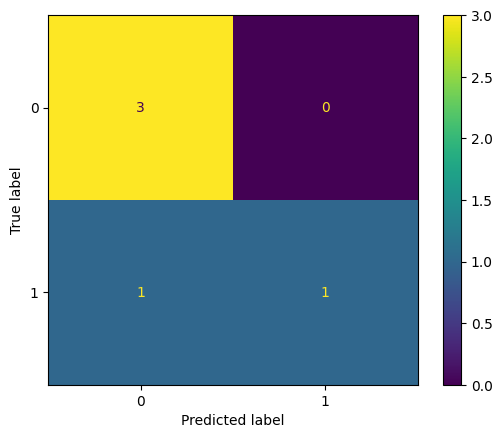

In [83]:
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

### Feature Importance

       Feature Importance
COD              0.151515
Oil              0.148687
As               0.137554
Se               0.111111
CODMn            0.111111
Cr6+             0.069264
F                0.063521
LAS              0.060606
VP               0.036768
Cd               0.030455


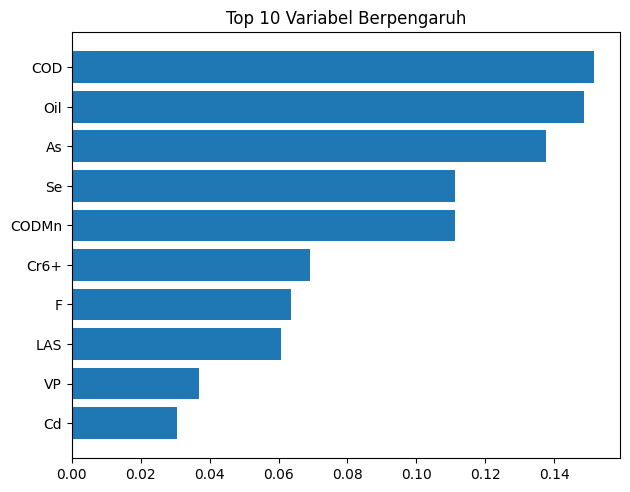

In [84]:
importance = rfc.feature_importances_

# Membuat DataFrame dengan nama kolom dari X_train
df_importance = pd.DataFrame({'Feature Importance': importance}, index=X_train.columns)

# Menyortir DataFrame berdasarkan Feature Importance
df_importance_sorted = df_importance.sort_values(by='Feature Importance', ascending=False).head(10)
# Menampilkan DataFrame dengan nama fitur
pd.set_option('display.max_rows', None)
print(df_importance_sorted)

# plot feature importance
# plt.figure(figsize=(8, 10))
df_importance_sorted = df_importance_sorted[::-1]
plt.barh(df_importance_sorted.index, df_importance_sorted['Feature Importance'])
plt.tight_layout()
plt.title('Top 10 Variabel Berpengaruh')
# plt.xticks(rotation=90)
plt.show()

## Cluster Months

In [132]:
df = Data.drop(columns=['NO.'], axis=1)

In [133]:
# Mengagregasi data pada NO dengan menggunakan Avg
df = df.groupby('date').mean().reset_index()

# Menampilkan hasil agregasi
print(df)

       date        PH        DO        COD     NH3-N        TP     CODMn  \
0   2019.07  7.443571  8.107143  24.928571  0.987857  0.238571  6.378571   
1   2019.08  7.478571  8.400000  26.785714  0.988571  0.235714  6.378571   
2   2019.09  7.385000  8.850000  21.785714  1.196429  0.207143  6.414286   
3   2019.10  7.765000  8.200000  17.142857  0.945000  0.205000  6.328571   
4   2019.11  7.629286  8.398571  14.785714  0.939286  0.197143  5.364286   
5   2019.12  7.825714  8.871429  17.642857  0.928571  0.179286  6.571429   
6   2020.01  7.745000  8.357143  12.142857  0.920000  0.163571  4.914286   
7   2020.03  7.774286  8.457143  22.571429  1.250714  0.172143  5.200000   
8   2020.04  7.787143  8.300000  22.857143  1.287857  0.177857  5.350000   
9   2020.05  7.622143  8.035714  24.000000  1.153571  0.174286  5.100000   
10  2020.06  7.637857  8.242857  22.357143  1.031429  0.203571  5.257143   
11  2020.07  7.697143  8.557143  19.928571  1.057857  0.202143  5.450000   

           

In [134]:
df2 = df.drop(columns=['date'], axis=1)

In [135]:
#Scaling data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df2)
scaled_df = pd.DataFrame(scaled_df, columns= df2.columns)
scaled_df


,PH,DO,COD,NH3-N,TP,CODMn,F,Oil,Cr6+,LAS,Cu,Zn,Cd,As,Hg,CN,VP,S,Se
0,-1.475331,-1.165627,1.043857,-0.549599,1.828808,1.090958,-0.554093,-1.103931,2.257696,-1.064094,1.153426,0.688796,1.466439,0.291651,1.733455,0.832743,0.650791,-0.149638,-0.912811
1,-1.224247,0.007631,1.489388,-0.543943,1.704996,1.090958,-0.314485,-1.625473,1.711951,-0.731865,1.153426,0.509110,1.466439,0.291651,1.582172,0.832743,0.650791,-0.239420,-0.912811
2,-1.895512,1.810442,0.289881,1.102027,0.466875,1.150628,2.081594,0.147770,0.347588,-2.104113,-0.338430,2.845026,-0.488813,1.197009,0.371905,0.134708,-0.433861,-0.239420,1.169940
3,0.830541,-0.793619,-0.823947,-0.888975,0.374016,1.007421,0.284534,1.399471,-0.626957,-1.280764,-1.415882,-0.029948,-1.140563,-1.397449,-0.970735,1.089914,1.807754,1.017535,-0.912811
4,-0.143049,0.001908,-1.389429,-0.934225,0.033532,-0.603657,-1.272917,1.086546,-0.665939,0.365933,-0.338430,-0.569005,-0.814688,-2.451448,-0.460154,-0.783758,-1.120807,-0.957680,-1.105658
5,1.266094,1.896291,-0.703996,-1.019068,-0.740293,1.413174,2.081594,-0.686697,-1.055757,-0.038519,-1.167240,-1.108063,-1.792314,-0.897475,-1.103108,-1.738964,-1.301583,-1.765723,0.822815
6,0.687064,-0.164065,-2.023454,-1.086943,-1.421260,-1.355493,-0.254583,-0.373772,-1.055757,0.640382,-1.250120,-0.209633,-0.488813,0.264626,-0.895093,-1.151145,-0.976187,-1.227028,0.899954
7,0.897155,0.236559,0.478375,1.531902,-1.049824,-0.878137,-0.524142,-1.208239,-0.626957,0.625937,-0.504192,-0.209633,-0.162938,0.588933,-0.781631,-0.636804,-0.542326,0.029928,1.324218
8,0.989390,-0.392994,0.546918,1.826027,-0.802199,-0.627525,-0.584044,-0.165155,-0.432048,0.611493,-0.338430,-0.029948,-0.162938,0.521369,-0.724900,-0.489849,-0.542326,-0.329203,1.555635
9,-0.194291,-1.451788,0.821091,0.762652,-0.956965,-1.045211,-0.224632,0.147770,-0.237139,0.958166,0.324617,-0.389319,0.162938,0.778112,-0.592527,-0.673542,-0.578481,0.927753,-0.719963


### Inertia Method

In [136]:
# finding optimal number of clusters
inertia = []
max_clusters = 11
for n_cluster in range(1, max_clusters):
    kmeans = KMeans(n_clusters=n_cluster, random_state=123, n_init=n_cluster)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

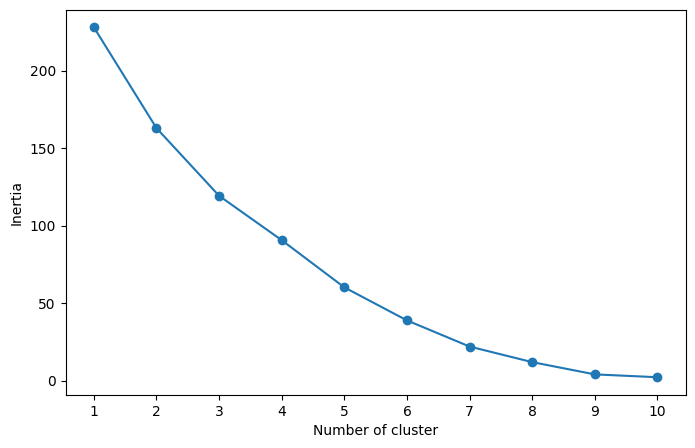

In [137]:
#Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(np.arange(1, max_clusters), inertia, marker='o')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.xticks(np.arange(1, max_clusters))
plt.show()



Dalam kurva elbow, titik 'belokan' yang terbentuk pada grafik umumnya dianggap sebagai petunjuk jumlah klaster yang sesuai. Meskipun demikian, nilai 'optimal' dari 'k' yang diperoleh dari metode kurva elbow sering kali agak "ambigu" atau tidak sepenuhnya pasti dalam menentukan jumlah klaster ('k') yang terbaik. Pada grafik di atas, pilihan 'k' diatur menjadi 6 atau 7 karena grafik yang dihasilkan menunjukkan adanya belokan dan kemudian level off. Untuk memastikan bahwa 'k' yang dipilih memang optimal, analisis lebih lanjut akan dilakukan menggunakan analisis silhouette.

### Silhouette Analysis Method

In [138]:
from sklearn.metrics import silhouette_score

# Silhouette Analysis
range_n_clusters = [2, 3]
for num_clusters in range_n_clusters:

    # Initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=500, random_state=1)
    kmeans.fit(scaled_df)
    cluster_labels = kmeans.labels_

    # Silhouette Score
    silhouette_avg = silhouette_score(scaled_df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))



For n_clusters=2, the silhouette score is 0.21647091459319878
For n_clusters=3, the silhouette score is 0.23322361383020043



Silhouette score dapat membantu menentukan jumlah cluster yang optimal dalam analisis klaster (clustering). Semakin tinggi silhouette score, semakin baik. Dalam kasus ini, score tertinggi adalah untuk n_clusters=6 dengan nilai silhouette sebesar 0.343.

Jadi, berdasarkan nilai silhouette score, jumlah cluster terbaik adalah 6.  

In [139]:
from sklearn.cluster import KMeans

# Inisialisasi objek KMeans dengan 3 cluster
kmeans = KMeans(n_clusters=3, random_state=1)

# Melakukan fitting dan prediksi label cluster
scaled_df['cluster'] = kmeans.fit_predict(scaled_df)

# Menampilkan DataFrame yang sudah ditambahkan kolom cluster
print(scaled_df)

          PH        DO       COD     NH3-N        TP     CODMn         F  \
0  -1.475331 -1.165627  1.043857 -0.549599  1.828808  1.090958 -0.554093   
1  -1.224247  0.007631  1.489388 -0.543943  1.704996  1.090958 -0.314485   
2  -1.895512  1.810442  0.289881  1.102027  0.466875  1.150628  2.081594   
3   0.830541 -0.793619 -0.823947 -0.888975  0.374016  1.007421  0.284534   
4  -0.143049  0.001908 -1.389429 -0.934225  0.033532 -0.603657 -1.272917   
5   1.266094  1.896291 -0.703996 -1.019068 -0.740293  1.413174  2.081594   
6   0.687064 -0.164065 -2.023454 -1.086943 -1.421260 -1.355493 -0.254583   
7   0.897155  0.236559  0.478375  1.531902 -1.049824 -0.878137 -0.524142   
8   0.989390 -0.392994  0.546918  1.826027 -0.802199 -0.627525 -0.584044   
9  -0.194291 -1.451788  0.821091  0.762652 -0.956965 -1.045211 -0.224632   
10 -0.081560 -0.621922  0.426967 -0.204568  0.312110 -0.782665 -0.014975   
11  0.343746  0.637184 -0.155650  0.004714  0.250204 -0.460450 -0.703848   

         Oi

In [140]:
cluster= scaled_df['cluster']
df = pd.concat([df, cluster], axis=1)
df

,date,PH,DO,COD,NH3-N,TP,CODMn,F,Oil,Cr6+,...,Cu,Zn,Cd,As,Hg,CN,VP,S,Se,cluster
0,2019.07,7.443571,8.107143,24.928571,0.987857,0.238571,6.378571,0.666429,0.097857,0.020429,...,0.052857,0.044286,0.000314,0.002514,0.000204,0.012000,0.000843,0.008071,0.000571,0
1,2019.08,7.478571,8.400000,26.785714,0.988571,0.235714,6.378571,0.672143,0.094286,0.019429,...,0.052857,0.043571,0.000314,0.002514,0.000199,0.012000,0.000843,0.008000,0.000571,0
2,2019.09,7.385000,8.850000,21.785714,1.196429,0.207143,6.414286,0.729286,0.106429,0.016929,...,0.040000,0.052857,0.000271,0.002993,0.000153,0.010643,0.000629,0.008000,0.000957,0
3,2019.10,7.765000,8.200000,17.142857,0.945000,0.205000,6.328571,0.686429,0.115000,0.015143,...,0.030714,0.041429,0.000257,0.001621,0.000102,0.012500,0.001071,0.009000,0.000571,2
4,2019.11,7.629286,8.398571,14.785714,0.939286,0.197143,5.364286,0.649286,0.112857,0.015071,...,0.040000,0.039286,0.000264,0.001064,0.000121,0.008857,0.000493,0.007429,0.000536,1
5,2019.12,7.825714,8.871429,17.642857,0.928571,0.179286,6.571429,0.729286,0.100714,0.014357,...,0.032857,0.037143,0.000243,0.001886,0.000097,0.007000,0.000457,0.006786,0.000893,1
6,2020.01,7.745000,8.357143,12.142857,0.920000,0.163571,4.914286,0.673571,0.102857,0.014357,...,0.032143,0.040714,0.000271,0.002500,0.000105,0.008143,0.000521,0.007214,0.000907,1
7,2020.03,7.774286,8.457143,22.571429,1.250714,0.172143,5.200000,0.667143,0.097143,0.015143,...,0.038571,0.040714,0.000279,0.002671,0.000109,0.009143,0.000607,0.008214,0.000986,1
8,2020.04,7.787143,8.300000,22.857143,1.287857,0.177857,5.350000,0.665714,0.104286,0.015500,...,0.040000,0.041429,0.000279,0.002636,0.000111,0.009429,0.000607,0.007929,0.001029,1
9,2020.05,7.622143,8.035714,24.000000,1.153571,0.174286,5.100000,0.674286,0.106429,0.015857,...,0.045714,0.040000,0.000286,0.002771,0.000116,0.009071,0.000600,0.008929,0.000607,1


In [141]:
# df.to_excel('Water Quality (Cluster by Months).xlsx', index=False)

## Classification (Random Forest)

In [142]:
X=df.drop(columns=['cluster', 'date'], axis=1)
y=df['cluster']

In [143]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

In [144]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

### Modeling

In [145]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=123)

rfc.fit(X_train, y_train)
y_pred_train = rfc.predict(X_train)
y_pred_test = rfc.predict(X_test)

accuracy_train = accuracy_score(y_pred_train, y_train)
accuracy_test = accuracy_score(y_pred_test, y_test)
f1_train = f1_score(y_pred_train, y_train, average="weighted")
f1_test = f1_score(y_pred_test, y_test, average="weighted")

print("Accuracy Train : ", accuracy_train)
print("Accuracy Test : ", accuracy_test)
print("F1 Score Train : ", f1_train)
print("F1 Score Test : ", f1_test)


Accuracy Train :  1.0
Accuracy Test :  1.0
F1 Score Train :  1.0
F1 Score Test :  1.0


### Confusion Matrix

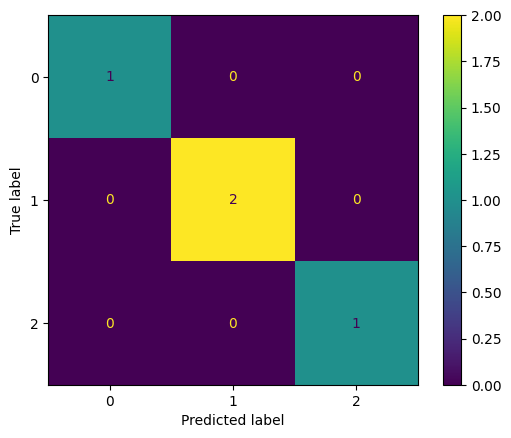

In [146]:
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

### Feature Importance

       Feature Importance
VP               0.119856
CN               0.115692
Oil              0.100174
LAS              0.082479
CODMn            0.063839
Zn               0.060865
Cr6+             0.057760
S                0.055311
TP               0.054875
Hg               0.053757


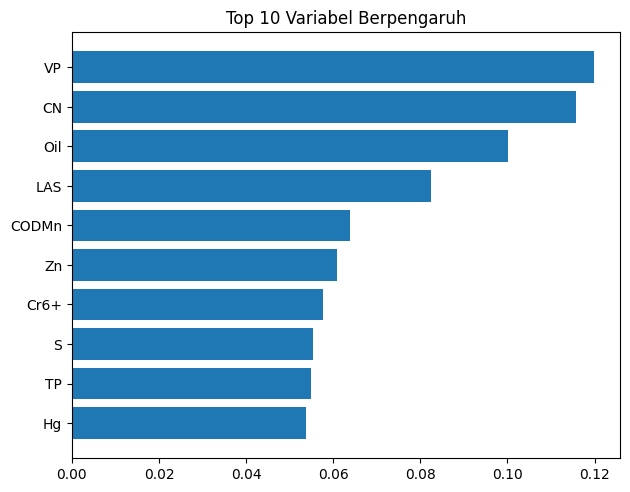

In [147]:
importance = rfc.feature_importances_

# Membuat DataFrame dengan nama kolom dari X_train
df_importance = pd.DataFrame({'Feature Importance': importance}, index=X_train.columns)

# Menyortir DataFrame berdasarkan Feature Importance
df_importance_sorted = df_importance.sort_values(by='Feature Importance', ascending=False).head(10)
# Menampilkan DataFrame dengan nama fitur
pd.set_option('display.max_rows', None)
print(df_importance_sorted)

# plot feature importance
# plt.figure(figsize=(8, 10))
df_importance_sorted = df_importance_sorted[::-1]
plt.barh(df_importance_sorted.index, df_importance_sorted['Feature Importance'])
plt.tight_layout()
plt.title('Top 10 Variabel Berpengaruh')
# plt.xticks(rotation=90)
plt.show()